In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

In [2]:
#MARINA FRIDMAN'S CODE
# load data (prepared by load_immi_articles, or load_climate_clusts)
df = pd.read_csv('../data/klima_articles_5Copy.csv', index_col=0)

# convert published date to datetime
date_format = '%Y-%m-%dT%H:%M:%S'
df['pub_date_dt'] = pd.to_datetime(df.pub_date, format=date_format)

# find NTB articles
df['is_ntb'] = df.authors.str.contains('NTB')
df['is_ntb'] = df.is_ntb.fillna(False)

# fix indices
df['new_idx'] = np.where(df.id.isna(), df.index, df.id)
df.drop('id',axis=1, inplace=True)
df.set_index('new_idx', inplace=True)
df.index.rename('id', inplace=True)

# drop duplicates
df = df[(~df.index.duplicated())]

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#MARINA FRIDMAN'S CODE
# load stopwords
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords.txt", "r")]

mush = df.title

# initialize tokenizer - regex includes alphabetic characters, including letters with accents. 
# excludes punctuation and numbers.
tokenizer = RegexpTokenizer('[^\W\d_]+')

# make all lower case
mush = mush.str.lower()

# tokenize text. 
words = mush.apply(lambda x: tokenizer.tokenize(x))

words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# combine into a pandas Series, make word count
word_freq = pd.Series(words).value_counts()


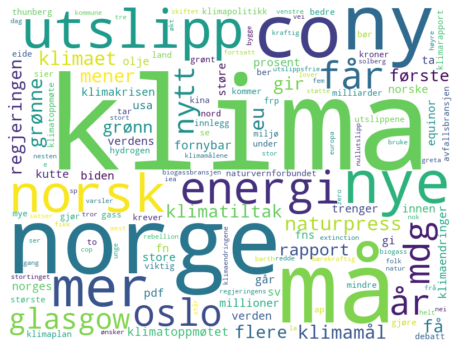

NameError: name 'word_freq_table' is not defined

In [4]:
wordcloud = WordCloud(width=800,height=600, 
                      max_words=150,
                      relative_scaling=.6,
                      background_color='white',
                      normalize_plurals=False).generate_from_frequencies(word_freq)

#plot the wordcloud object
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')

#plt.savefig('../figures/wordcloud_all_2.png')
plt.show()
word_freq_table.head(20)

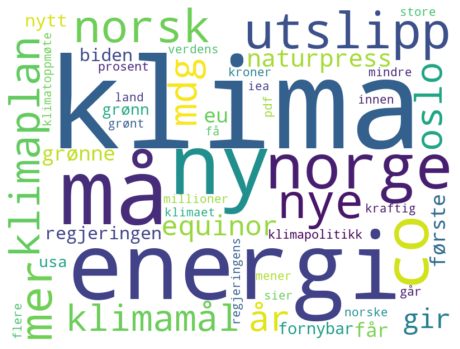

,word,frequency
0,klima,652
1,energi,369
2,må,364
3,ny,328
4,norge,299
5,co,298
6,utslipp,282
7,nye,263
8,norsk,242
9,mer,240


In [5]:
# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date range
start_date = '2021-01-01'
end_date = '2021-06-30'
data = df[(df['pub_day'] >= start_date) & (df['pub_day'] <= end_date)]

# preprocess text data
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#plt.savefig('../figures/wordcloud_all_p1.png')
plt.show()

# print table
word_freq_table.head(20)


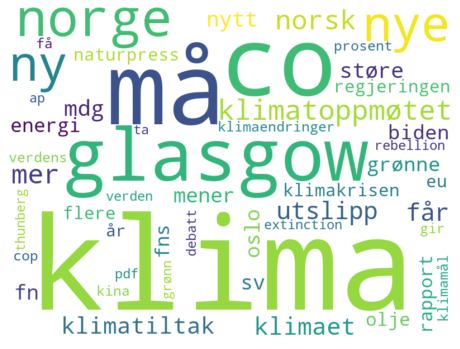

In [28]:
# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date range
start_date = '2021-08-01'
end_date = '2021-12-31'
data = df[(df['pub_day'] >= start_date) & (df['pub_day'] <= end_date)]

# preprocess text data
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#plt.savefig('../figures/wordcloud_all_p2.png')
plt.show()

# print table
word_freq_table.head(20)


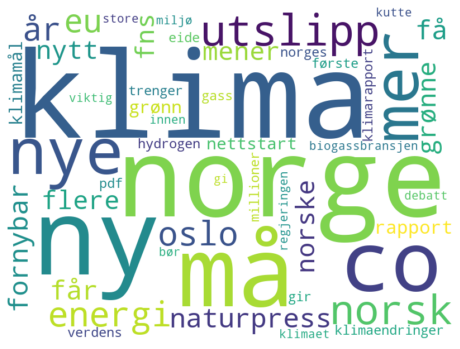

In [29]:
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date range
start_date = '2022-01-01'
end_date = '2022-05-31'
data = df[(df['pub_day'] >= start_date) & (df['pub_day'] <= end_date)]

# preprocess text data
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#plt.savefig('../figures/wordcloud_all_p3.png')
plt.show()

# print table
word_freq_table.head(20)

- Make a word cloud for the 5 days with the most articles. How many words in each word cloud? Max is 50 now, is that good, or less? 
- Make one for the days with the lowest? 
- Make one for each of the "spike" periods. 
- How do I do different colour paletts? 

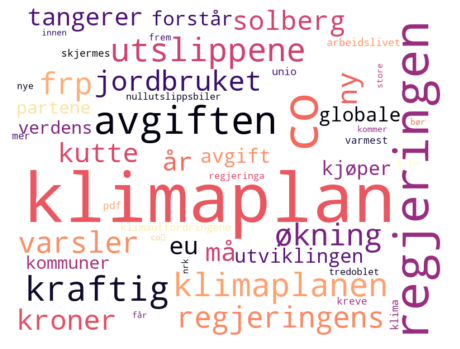

In [31]:
#SPIKE 1

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2021-01-08'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='magma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#plt.savefig('../figures/wordcloud_spike1.png')
plt.show()

# print table
word_freq_table.head(50)

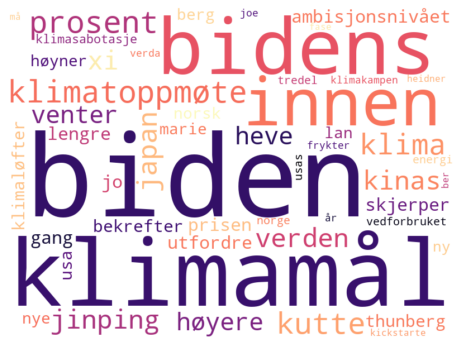

In [33]:
#SPIKE 2

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2021-04-22'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='magma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#plt.savefig('../figures/wordcloud_spike2.png')
plt.show()

# print table
word_freq_table.head(50)

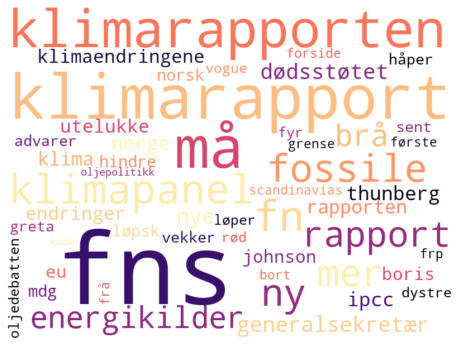

,word,frequency
0,fns,61
1,klimarapport,46
2,må,42
3,klimarapporten,38
4,fn,25
5,klimapanel,24
6,fossile,22
7,mer,21
8,ny,21
9,rapport,19


In [10]:
#SPIKE 3

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2021-08-09'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='magma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#plt.savefig('../figures/wordcloud_spike3.png')
plt.show()

# print table
word_freq_table.head(50)


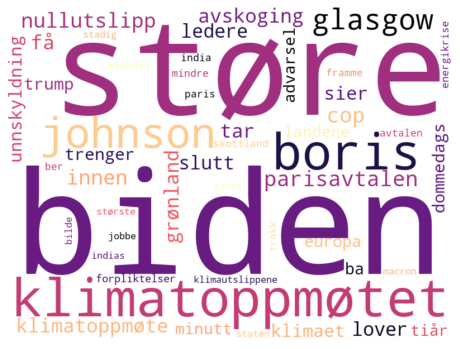

In [35]:
#SPIKE 4

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2021-11-01'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='magma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('../figures/wordcloud_spike4.png')
plt.show()


# print table
#word_freq_table.head(50)

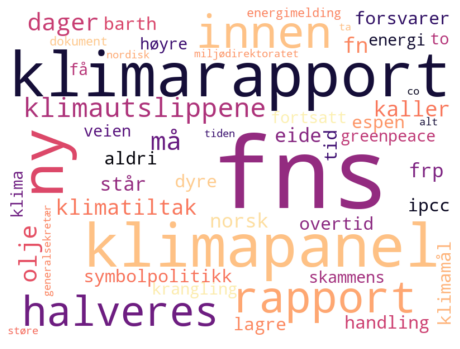

,word,frequency
0,fns,34
1,klimarapport,24
2,klimapanel,23
3,ny,22
4,innen,14
5,rapport,13
6,halveres,12
7,klimautslippene,12
8,må,11
9,olje,10


In [11]:
#SPIKE 5

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2022-04-04'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='magma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

#plt.savefig('../figures/wordcloud_spike5.png')
plt.show()

# print table
word_freq_table.head(50)

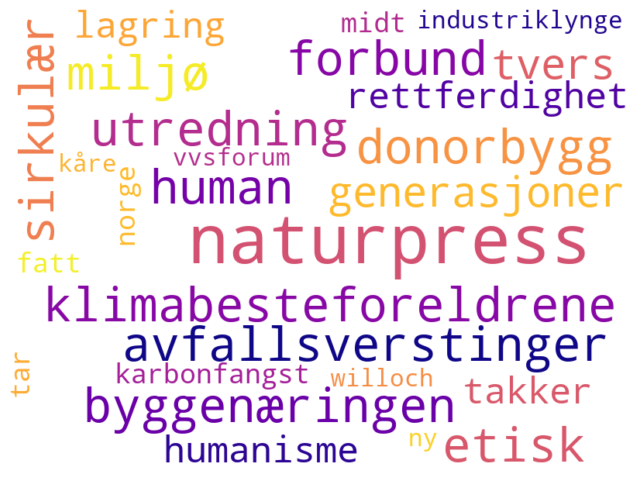

,word,frequency
0,naturpress,2
1,klimabesteforeldrene,1
2,miljø,1
3,sirkulær,1
4,byggenæringen,1
5,donorbygg,1
6,avfallsverstinger,1
7,forbund,1
8,etisk,1
9,human,1


In [10]:
#Lowest 1 - 07.12.2021 (4 articles)

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2021-12-07'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='plasma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# print table
word_freq_table.head(50)

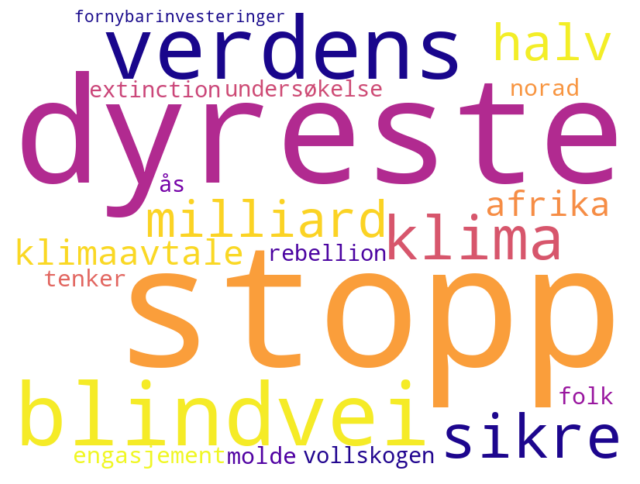

,word,frequency
0,stopp,2
1,dyreste,2
2,blindvei,2
3,verdens,2
4,klima,1
5,sikre,1
6,milliard,1
7,halv,1
8,klimaavtale,1
9,afrika,1


In [11]:
#Lowest 2 - 02.03.2022 (5 articles)

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2022-03-02'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='plasma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# print table
word_freq_table.head(50)

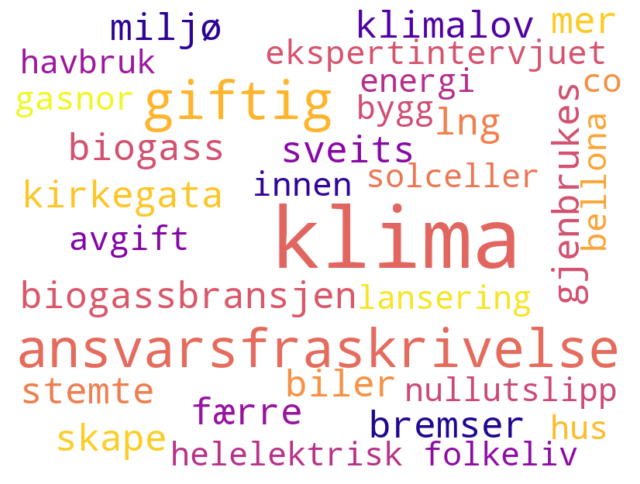

In [12]:
#Lowest 3 - 13.06.2021 (8 articles)

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2021-06-13'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='plasma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

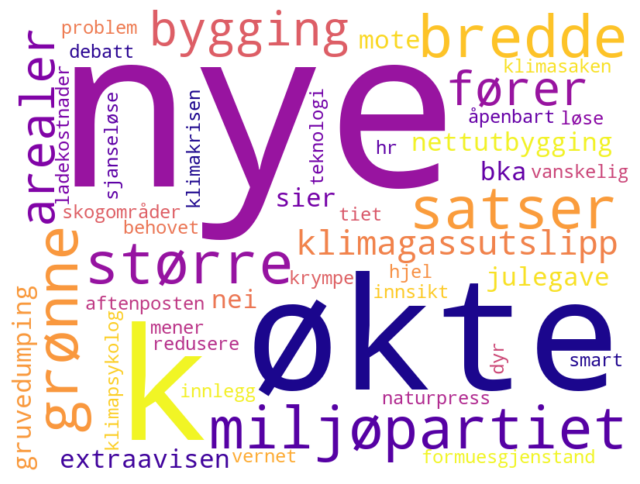

In [13]:
#Lowest 4 - 18.12.2021 (10 articles)

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2021-12-18'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='plasma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

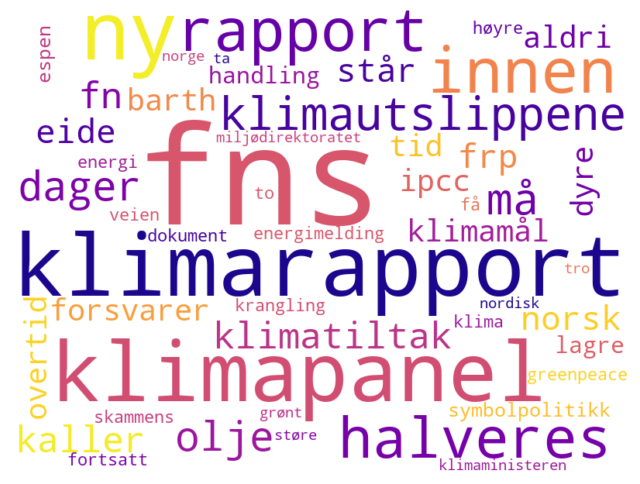

In [14]:
#Lowest 5 - 26.02.22 (11 articles)

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date
date = '2022-04-04'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='plasma', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

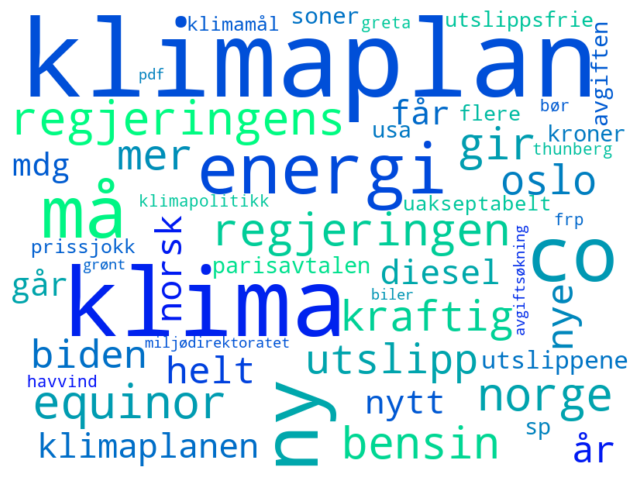

In [15]:
#SPIKE period 1

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date range
start_date = '2021-01-01'
end_date = '2021-01-31'
data = df[(df['pub_day'] >= start_date) & (df['pub_day'] <= end_date)]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='winter', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

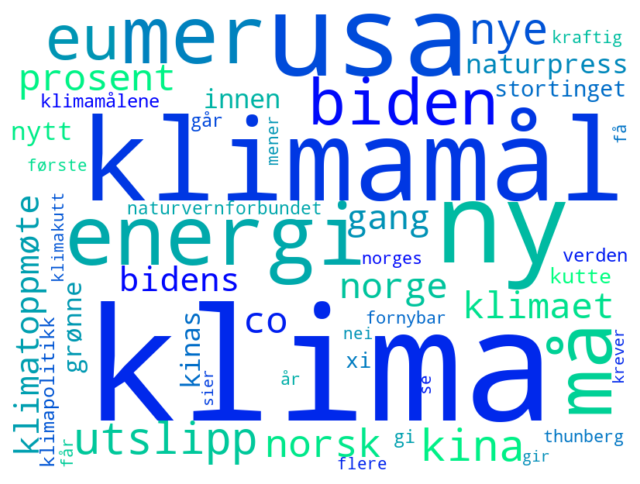

In [16]:
#SPIKE period 2

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date range
start_date = '2021-04-01'
end_date = '2021-04-30'
data = df[(df['pub_day'] >= start_date) & (df['pub_day'] <= end_date)]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='winter', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

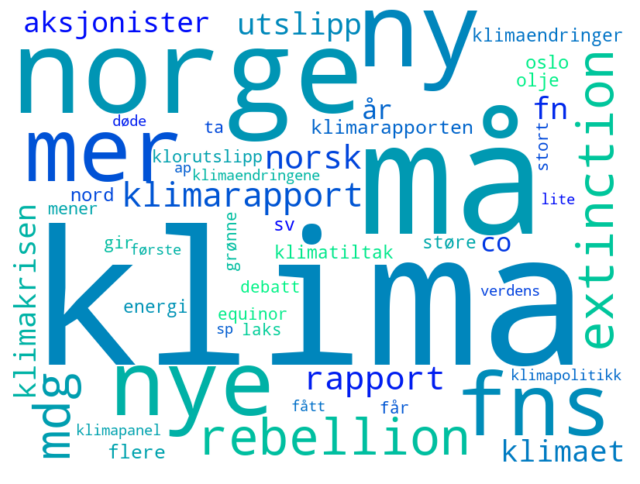

In [17]:
#SPIKE period 3

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date range
start_date = '2021-06-30'
end_date = '2021-08-31'
data = df[(df['pub_day'] >= start_date) & (df['pub_day'] <= end_date)]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='winter', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

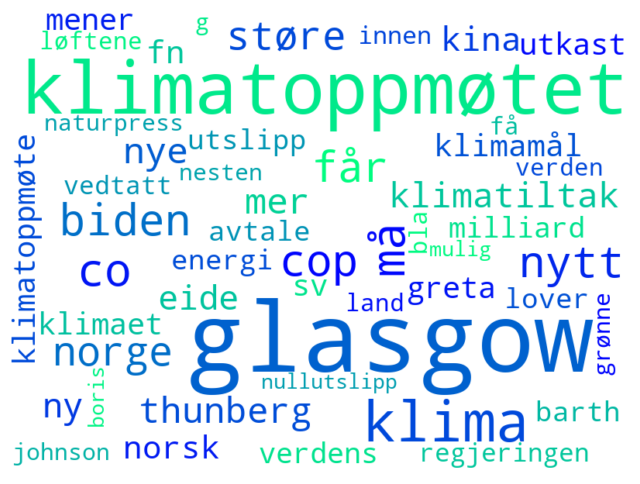

In [18]:
#SPIKE period 4

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date range
start_date = '2021-10-15'
end_date = '2021-11-15'
data = df[(df['pub_day'] >= start_date) & (df['pub_day'] <= end_date)]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='winter', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

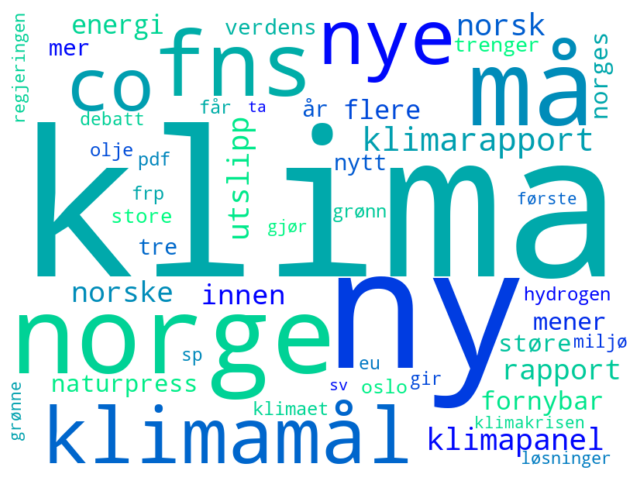

In [19]:
#SPIKE period 5

# convert published date to datetime
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date range
start_date = '2022-03-15'
end_date = '2022-04-15'
data = df[(df['pub_day'] >= start_date) & (df['pub_day'] <= end_date)]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
wordcloud = WordCloud(width=800,height=600, max_words=50, colormap='winter', relative_scaling=.6,
                      background_color='white',normalize_plurals=False).generate_from_frequencies(word_freq)

# plot word cloud
f,ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [20]:
df['pub_day'] = pd.to_datetime(df['pub_day'])

# filter data for a specific date range
date = '2021-11-01'
data = df[df['pub_day'] == date]

# preprocess text data
sw = [line.strip("\n") for line in open("../master/data/norwegian_stopwords.txt", "r")]
mush = data.title
tokenizer = RegexpTokenizer('[^\W\d_]+')
mush = mush.str.lower()
words = mush.apply(lambda x: tokenizer.tokenize(x))
words = [word for word in np.concatenate(words.reset_index(drop=True)) if word not in sw]

# generate word cloud
word_freq = pd.Series(words).value_counts()
word_freq_table = pd.DataFrame({'word': word_freq.index, 'frequency': word_freq.values})

# print table
word_freq_table.head(50)


,word,frequency
0,biden,41
1,støre,36
2,klimatoppmøtet,31
3,johnson,28
4,boris,28
5,glasgow,27
6,cop,22
7,parisavtalen,22
8,innen,21
9,nullutslipp,21
